# ÂØπÊï∞ÊçÆÂêàÂπ∂Âêé ÁúãÊáÇÊï∞ÊçÆÁªìÊûÑÂêé ÂàóÂêç  Áº∫Â§±ÊÉÖÂÜµ ÁõÆÊ†áÂàÜÂ∏É ÂÜ≥ÂÆöÊ∏ÖÊ¥óÁ≠ñÁï•  
# ÂØπÊï∞ÊçÆÁöÑÁ¨¨‰∏ÄÂç∞Ë±° & Ê∏ÖÊ¥óËÆ°Âàí

In [2]:
from pathlib import Path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
PARQUET_PATH = Path("../data/processed/training_oncourt.parquet")
CSV_PATH     = Path("../data/processed/training_oncourt.csv")

In [7]:
OUT_DIR = Path("reports/eda_1_raw_long")
OUT_DIR.mkdir(parents = True, exist_ok = True)

In [11]:
if PARQUET_PATH.exists():
    df = pd.read_parquet(PARQUET_PATH)
    source_used = PARQUET_PATH
elif CSV_PATH.exists():
    df = pd.read_csv(CSV_PATH)
    source_used = CSV_PATH
else:
    raise FileNotFoundError("none for both data/processed/training_oncourt.parquet and none for training_oncourt.csv")
print(f"‚úÖ Loaded: {source_used}   shape={df.shape}")
display(df.head())

‚úÖ Loaded: ..\data\processed\training_oncourt.parquet   shape=(2082, 33)


Player_id                 Player Team  season  Age  GP   W   L   Min   PTS  \
0          1          Stephen Curry  GSW    2020   33  63  37  26  34.2  32.0   
1          2           Bradley Beal  WAS    2020   28  60  32  28  35.8  31.3   
2          3         Damian Lillard  POR    2020   30  67  39  28  35.8  28.8   
3          4            Joel Embiid  PHI    2020   27  51  39  12  31.1  28.5   
4          5  Giannis Antetokounmpo  MIL    2020   26  61  40  21  33.0  28.1   

   ...  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  Unnamed: 30  salary_usd  
0  ...  3.4  1.2  0.1  1.9  47.9    8    0  3.9          NaN  43006362.0  
1  ...  3.1  1.2  0.4  2.3  45.0    4    0 -0.1          NaN  28751775.0  
2  ...  3.0  0.9  0.3  1.5  45.7   16    0  3.0          NaN  31626953.0  
3  ...  3.1  1.0  1.4  2.4  49.3   31    0  7.9          NaN  29542010.0  
4  ...  3.4  1.2  1.2  2.8  53.9   41    7  6.7          NaN  27528090.0  

[5 rows x 33 columns]

In [12]:
print("The shape is: ", df.shape)
print("\nColumn Names: ", list(df.columns))

print("\nData Type: ")
display(df.dtypes.value_counts())
display(df.dtypes)

# Â∏∏ËØÜÊÄßÊ£ÄÊü•ÔºöÂÖ≥ÈîÆÂàóÊòØÂê¶Â≠òÂú®
must_have = ["Player_id", "season", "salary_usd"]
missing = [c for c in must_have if c not in df.columns]
print("\nKey Columns Check: ", "OK" if not missing else f"Missing {missing}")

The shape is:  (2082, 33)

Column Names:  ['Player_id', 'Player', 'Team', 'season', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'Unnamed: 30', 'salary_usd']

Data Type: 


float64    23
int64       8
object      2
Name: count, dtype: int64

Player_id        int64
Player          object
Team            object
season           int64
Age              int64
GP               int64
W                int64
L                int64
Min            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
PF             float64
FP             float64
DD2              int64
TD3              int64
+/-            float64
Unnamed: 30    float64
salary_usd     float64
dtype: object


Key Columns Check:  OK


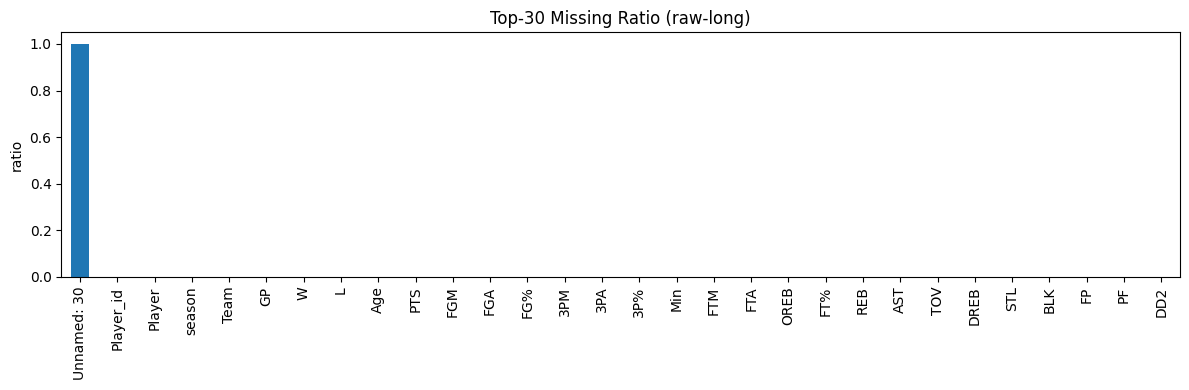

ÊÄª‰ΩìÁº∫Â§±ÊúÄÂ§ßÊØî‰æãÔºö 1.0


Unnamed: 30    1.0
Player_id      0.0
Player         0.0
season         0.0
Team           0.0
GP             0.0
W              0.0
L              0.0
Age            0.0
PTS            0.0
FGM            0.0
FGA            0.0
FG%            0.0
3PM            0.0
3PA            0.0
3P%            0.0
Min            0.0
FTM            0.0
FTA            0.0
OREB           0.0
FT%            0.0
REB            0.0
AST            0.0
TOV            0.0
DREB           0.0
STL            0.0
BLK            0.0
FP             0.0
PF             0.0
DD2            0.0
dtype: float64

In [13]:
# === Áº∫Â§±ÂÄºÊØî‰æã TopNÔºåÂØºÂá∫csv ===
na_ratio = df.isna().mean().sort_values(ascending=False)
na_ratio.to_csv(OUT_DIR / "missing_ratio_in_training_oncourt.csv")

topn = na_ratio.head(30)
ax = topn.plot(kind="bar", figsize=(12,4))
ax.set_title("Top-30 Missing Ratio (raw-long)")
ax.set_ylabel("ratio")
plt.tight_layout()
plt.show()

print("ÊÄª‰ΩìÁº∫Â§±ÊúÄÂ§ßÊØî‰æãÔºö", float(na_ratio.max()))
display(topn)

In [14]:
all_na_cols = [c for c in df.columns if df[c].isna().all()]
const_cols = []
for c in df.columns:
    try:
        nun = df[c].nunique(dropna=True)
        if nun <= 1:
            const_cols.append(c)
    except Exception:
        pass

dup_rows = df.duplicated().sum()

print("All missing Columns: ", all_na_cols)
print("Constant (unique value ‚â§ 1) column: ", const_cols)
print("Duplicated Rows: ", dup_rows)

# ÂØºÂá∫ÂàóË°®ÔºåÊñπ‰æøÊ∏ÖÊ¥óÈò∂ÊÆµÂºïÁî®
pd.Series(all_na_cols).to_csv(OUT_DIR / "all_na_cols_in_training_oncourt.csv", index=False, header=False)
pd.Series(const_cols).to_csv(OUT_DIR / "constant_cols_in_training_oncourt.csv", index=False, header=False)

All missing Columns:  ['Unnamed: 30']
Constant (unique value ‚â§ 1) column:  ['Unnamed: 30']
Duplicated Rows:  0


In [15]:
if set(["Player_id","season"]).issubset(df.columns):
    dup_keys = df.duplicated(subset=["Player_id", "season"]).sum()
    print("Set (Player_id, season) as primary key's duplicated rows: ", dup_keys)
    if dup_keys > 0:
        display(df[df.duplicated(subset=["Player_id","season"], keep=False)]
                .sort_values(["Player_id","season"])
                .head(10))
else:
    print("Missing Player_id or season columns, unable to check composite key.")

Set (Player_id, season) as primary key's duplicated rows:  0


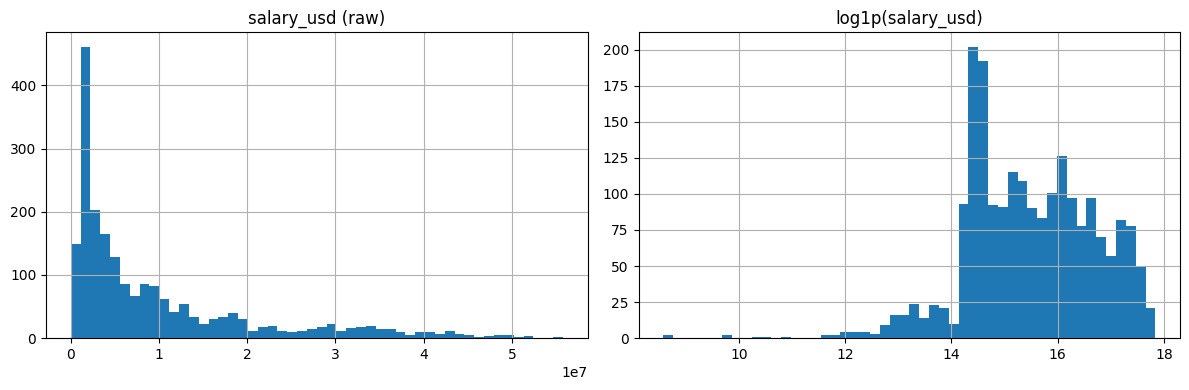

count    2.082000e+03
mean     9.794686e+06
std      1.104683e+07
min      5.318000e+03
10%      1.563518e+06
25%      2.068909e+06
50%      5.000000e+06
75%      1.296000e+07
90%      2.810354e+07
95%      3.534402e+07
99%      4.596348e+07
max      5.576122e+07
Name: salary_usd, dtype: float64

In [16]:
# === ÁõÆÊ†áÂèòÈáèÂàÜÂ∏ÉÔºàÂéüÂßã & log1pÔºâ ===
import numpy as np

assert "salary_usd" in df.columns, "Áº∫Â∞ë salary_usd Âàó"

fig, axes = plt.subplots(1,2, figsize=(12,4))
df["salary_usd"].dropna().hist(bins=50, ax=axes[0])
axes[0].set_title("salary_usd (raw)")

np.log1p(df["salary_usd"].clip(lower=0)).dropna().hist(bins=50, ax=axes[1])
axes[1].set_title("log1p(salary_usd)")
plt.tight_layout()
plt.show()

display(df["salary_usd"].describe(percentiles=[.1,.25,.5,.75,.9,.95,.99]))


mean 979W
std: 1104w 
min 5318 dollars(exibit 10 or two ways)
This is not normal distribution. a few very high salaries make the average higher.
10%   $1.56M     Ââç 10% ÁöÑÁêÉÂëòËñ™Ê∞¥‰Ωé‰∫é 156 ‰∏áÔºàÂ∫ïËñ™/‰∫åÂπ¥Á∫ßÂêàÂêåÔºâ
25%   $2.07M     Ââç 25% ÁöÑÁêÉÂëò‰Ωé‰∫é 207 ‰∏á
50%   $5.00M     ‰∏≠‰ΩçÊï∞ 500 ‰∏áÔºåÊØîÂùáÂÄº‰ΩéÂæàÂ§öÔºà‚Üí Âè≥ÂÅèÂàÜÂ∏ÉÔºâ
75%   $12.96M    Ââç 25% È´òËñ™ÁêÉÂëòÈÉΩÂú® 1296 ‰∏á‰ª•‰∏ä
90%   $28.1M     Ââç 10% Ë∂ÖÁ∫ßÈ´òËñ™ÁêÉÂëò
95%   $35.3M     È°∂Ëñ™ÁêÉÂëòÔºàÂ§ßÈÉ®ÂàÜÂ∑®ÊòüÂêàÂêåÔºâ
99%   $45.9M     È°∂Á∫ßË∂ÖÁ∫ßÂêàÂêå
max   $55.7M     ÂéÜÂè≤È°∂Ëñ™Ôºà‰æãÂ¶Ç Stephen Curry 2023-24Ôºâ

The sample number for every season: 


season
2020    408
2021    422
2022    418
2023    411
2024    423
Name: count, dtype: int64

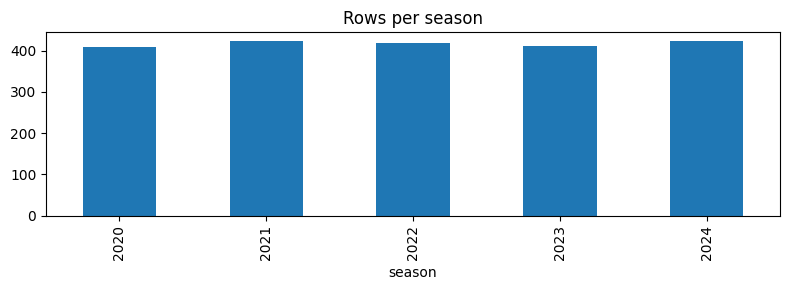

Top 15 Team Samples: 


Team
PHI    77
DET    76
TOR    74
SAS    73
BKN    72
DAL    72
OKC    72
LAC    71
MIA    71
CHA    71
MEM    71
POR    71
PHX    71
WAS    70
CHI    70
Name: count, dtype: int64

In [17]:
# === season & team ÂàÜÂ∏É ===
if "season" in df.columns:
    vc_season = df["season"].value_counts().sort_index()
    print("The sample number for every season: ")
    display(vc_season)

    ax = vc_season.plot(kind="bar", figsize=(8,3), title="Rows per season")
    plt.tight_layout(); plt.show()

if "Team" in df.columns:
    vc_team = df["Team"].value_counts()
    print("Top 15 Team Samples: ")
    display(vc_team.head(15))

Consistant CheckÔºö {'Min<=0 count': 0, 'GP<=0 count': 0}


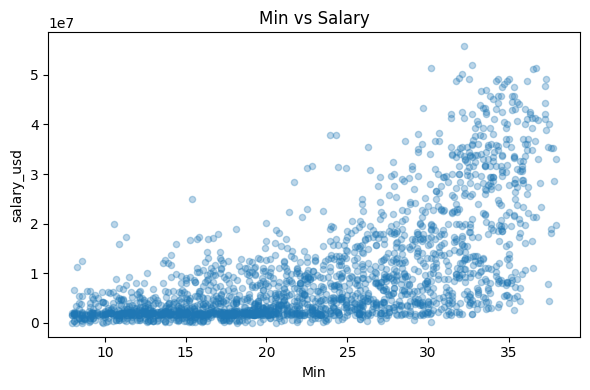

In [18]:
# === Âü∫Á°Ä‰∏ÄËá¥ÊÄßÊ£ÄÊü•ÔºöMin ‰∏é GP ===
issues = {}

if "Min" in df.columns:
    zero_min = (df["Min"] <= 0).sum()
    issues["Min<=0 count"] = int(zero_min)

if "GP" in df.columns:
    zero_gp = (df["GP"] <= 0).sum()
    issues["GP<=0 count"] = int(zero_gp)

print("Consistant CheckÔºö", issues)

# ÂèØËßÜÂåñ Min ‰∏é salary ÁöÑÂÖ≥Á≥ªÔºàÁ≤óÁúãÔºâ
if set(["Min","salary_usd"]).issubset(df.columns):
    df.plot(kind="scatter", x="Min", y="salary_usd", alpha=0.3, figsize=(6,4), title="Min vs Salary")
    plt.tight_layout(); plt.show()


In [23]:
# === ‰∏é salary ÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥ÔºàÊï∞ÂÄºÂàóÔºâ ===
num = df.select_dtypes(include="number").copy()

# ÊéíÈô§ÁõÆÊ†áËá™Ë∫´
num_wo_target = num.drop(columns=[c for c in ["salary_usd"] if c in num.columns], errors="ignore")

corr = num_wo_target.corrwith(num["salary_usd"]).sort_values(ascending=False)
corr_df = pd.DataFrame({"feature": corr.index, "corr_with_salary": corr.values})

# ÂØºÂá∫ÂÆåÊï¥Ë°®
corr_df.to_csv(OUT_DIR / "corr_with_salary.csv", index=False)

print("‰∏é salary Ê≠£Áõ∏ÂÖ≥ Top 32")
display(corr_df.head(32))

print("‰∏é salary Ë¥üÁõ∏ÂÖ≥ Top 32")
display(corr_df.tail(32))

‰∏é salary Ê≠£Áõ∏ÂÖ≥ Top 32


feature  corr_with_salary
0            FP          0.726206
1           PTS          0.722465
2           FGM          0.713390
3           FGA          0.692322
4           FTM          0.662823
5           FTA          0.647717
6           Min          0.641671
7           TOV          0.623317
8           AST          0.587395
9          DREB          0.524406
10          DD2          0.459385
11          STL          0.456930
12          3PM          0.456388
13          3PA          0.455468
14          REB          0.449505
15           PF          0.339211
16          Age          0.334063
17          +/-          0.332180
18          TD3          0.287209
19            W          0.249648
20          BLK          0.231144
21          FT%          0.225183
22           GP          0.183503
23         OREB          0.168753
24       season          0.115659
25          FG%          0.099427
26          3P%          0.098019
27            L         -0.008634
28    Player_id         -0.529026
29  Unnamed: 30               NaN

‰∏é salary Ë¥üÁõ∏ÂÖ≥ Top 32


feature  corr_with_salary
0            FP          0.726206
1           PTS          0.722465
2           FGM          0.713390
3           FGA          0.692322
4           FTM          0.662823
5           FTA          0.647717
6           Min          0.641671
7           TOV          0.623317
8           AST          0.587395
9          DREB          0.524406
10          DD2          0.459385
11          STL          0.456930
12          3PM          0.456388
13          3PA          0.455468
14          REB          0.449505
15           PF          0.339211
16          Age          0.334063
17          +/-          0.332180
18          TD3          0.287209
19            W          0.249648
20          BLK          0.231144
21          FT%          0.225183
22           GP          0.183503
23         OREB          0.168753
24       season          0.115659
25          FG%          0.099427
26          3P%          0.098019
27            L         -0.008634
28    Player_id         -0.529026
29  Unnamed: 30               NaN

In [24]:
# === Êï∞ÂÄºÁâπÂæÅÁöÑÊûÅÁ´ØÂÄºÔºà‰ª• |z|>3 Á≤óÁï•ËÆ°Êï∞Ôºâ ===
from scipy.stats import zscore

extreme_stats = []
for c in num_wo_target.columns:
    s = num_wo_target[c].dropna().astype(float)
    if len(s) < 50: 
        continue
    z = zscore(s)
    extreme = int((np.abs(z) > 3).sum())
    extreme_stats.append((c, extreme, int(len(s))))

extreme_df = pd.DataFrame(extreme_stats, columns=["feature", "extreme_count(|z|>3)", "non_null"])
extreme_df = extreme_df.sort_values("extreme_count(|z|>3)", ascending=False)
display(extreme_df.head(20))
extreme_df.to_csv(OUT_DIR / "extreme_value_counts_in_training_oncourt.csv", index=False)


feature  extreme_count(|z|>3)  non_null
26     DD2                    66      2082
14     FTM                    44      2082
17    OREB                    40      2082
23     BLK                    37      2082
15     FTA                    36      2082
18    DREB                    33      2082
19     REB                    33      2082
20     AST                    33      2082
10     FG%                    29      2082
27     TD3                    26      2082
21     TOV                    25      2082
16     FT%                    21      2082
7      PTS                    16      2082
25      FP                    15      2082
11     3PM                    14      2082
22     STL                    13      2082
12     3PA                    13      2082
8      FGM                    12      2082
28     +/-                     9      2082
13     3P%                     6      2082

In [26]:
# === ÂΩ¢ÊàêÊ∏ÖÊ¥óTODOÂª∫ËÆÆÔºàÊ†πÊçÆ‰∏äÈù¢EDAÁöÑÂèëÁé∞ÔºåÁîüÊàêÂæÖÂäûÔºâ ===
todo = []

# 1) ÂÖ®Á©∫Âàó
if len(all_na_cols) > 0:
    todo.append(f"Âà†Èô§ÂÖ®Á©∫ÂàóÔºö{all_na_cols}")

# 2) Â∏∏Êï∞Âàó
if len(const_cols) > 0:
    todo.append(f"Âà†Èô§Â∏∏Êï∞ÂàóÔºö{const_cols}")

# 3) Áº∫Â§±ËæÉÂ§öÁöÑÂàóÔºà>50%Ôºâ
high_na_cols = list(na_ratio[na_ratio > 0.5].index)
if high_na_cols:
    todo.append(f"Áº∫Â§±>50%ÁöÑÂàóÔºàËÄÉËôëÂà†Èô§ÊàñË∞®ÊÖéÂ°´Ë°•ÔºâÔºö{high_na_cols}")

# 4) ‰∏ªÈîÆÈáçÂ§ç
if set(["Player_id","season"]).issubset(df.columns):
    dup_keys_cnt = df.duplicated(subset=["Player_id", "season"]).sum()
    if dup_keys_cnt > 0:
        todo.append(f"(Player_id, season) Â§çÂêàÈîÆÊúâÈáçÂ§çÔºö{dup_keys_cnt} Ë°åÔºåÈúÄË¶ÅÂéªÈáçËßÑÂàô")

# 5) Min/GP ÈóÆÈ¢ò
if "Min" in df.columns and (df["Min"] <= 0).sum() > 0:
    todo.append("Min<=0 ÁöÑÊ†∑Êú¨ÔºåÈúÄÁ°ÆËÆ§ÊòØÂê¶Âà†Èô§Êàñ‰øùÁïôÔºà‰æãÂ¶ÇÂá†‰πéÊú™Âá∫Âú∫Ôºâ")
if "GP" in df.columns and (df["GP"] <= 0).sum() > 0:
    todo.append("GP<=0 ÁöÑÊ†∑Êú¨ÔºåÈúÄÁ°ÆËÆ§ÊòØÂê¶Âà†Èô§Êàñ‰øùÁïô")

# 6) ÁõÆÊ†áÂàÜÂ∏ÉÂº∫ÂÅèÊÄÅ ‚Üí ÂêéÁª≠Âª∫Ê®°ÊòØÂê¶ÂØπ salary or ÁâπÂæÅÂÅö log1p
todo.append("ÁõÆÊ†á salary_usd ÂÅèÊÄÅËæÉÂº∫ÔºàÈÄöÂ∏∏Â¶ÇÊ≠§ÔºâÔºåÂêéÁª≠ÂèØËÄÉËôëÂØπËæìÂÖ•ÁâπÂæÅÂÅö log/ÂàÜÊ°∂ÔºåËÄåÁõÆÊ†á‰øùÊåÅÂéüÂÄºÊàñÊä•ÂëäÂØπÊï∞ÊåáÊ†á")

print("üßπ Ê∏ÖÊ¥ó/È¢ÑÂ§ÑÁêÜ TODO ËçâÂçïÔºö")
for i, t in enumerate(todo, 1):
    print(f"{i}. {t}")

# ÂêåÊ≠•‰øùÂ≠òÂà∞ÊñáÊú¨Êñá‰ª∂ÔºåÊñπ‰æø‰πãÂêé clean_preprocess.py ÂèÇËÄÉ
with open(OUT_DIR / "cleaning_todo.txt", "w", encoding="utf-8") as f:
    for t in todo:
        f.write("- " + t + "\n")
print("\n‚úÖ Â∑≤‰øùÂ≠òÔºö", OUT_DIR / "cleaning_todo_training_oncourt.txt")

üßπ Ê∏ÖÊ¥ó/È¢ÑÂ§ÑÁêÜ TODO ËçâÂçïÔºö
1. Âà†Èô§ÂÖ®Á©∫ÂàóÔºö['Unnamed: 30']
2. Âà†Èô§Â∏∏Êï∞ÂàóÔºö['Unnamed: 30']
3. Áº∫Â§±>50%ÁöÑÂàóÔºàËÄÉËôëÂà†Èô§ÊàñË∞®ÊÖéÂ°´Ë°•ÔºâÔºö['Unnamed: 30']
4. ÁõÆÊ†á salary_usd ÂÅèÊÄÅËæÉÂº∫ÔºàÈÄöÂ∏∏Â¶ÇÊ≠§ÔºâÔºåÂêéÁª≠ÂèØËÄÉËôëÂØπËæìÂÖ•ÁâπÂæÅÂÅö log/ÂàÜÊ°∂ÔºåËÄåÁõÆÊ†á‰øùÊåÅÂéüÂÄºÊàñÊä•ÂëäÂØπÊï∞ÊåáÊ†á

‚úÖ Â∑≤‰øùÂ≠òÔºö reports\eda_1_raw_long\cleaning_todo_training_oncourt.txt
